In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob


# Set the directory where the transaction CSV files are located
directory = 'F:/Career/Thesis Projects/Karakata Holdings/Data Files/'

# Create a list of file paths for all files that match the pattern 'Transactions*.csv'
file_paths = glob.glob(directory + 'Transactions*.csv')

# Create an empty list to store the dataframes
Ts = []

# Loop through each file and read in the data.
for file_path in file_paths:
    df = pd.read_csv(file_path, header=None, names=['Account', 'Day', 'Details', 'Amount', 'Balance'], on_bad_lines='skip')
    Ts.append(df)

# Concatenate all of the dataframes into a single dataframe
T = pd.concat(Ts, ignore_index=True)

#Remove duplicates from the dataframe and save the new dataframe
T = T.drop_duplicates()
T=T.sort_values('Day')
T.to_csv(directory+'UpdatedLedger.csv',index=False)
T

,Account,Day,Details,Amount,Balance
0,42 3rd Street Deposit,1,Deposit,-1230.69200,98769.30
7,Purchase from Discount Market,1,ItemPurchase,-80.00000,82305.47
6,Purchase from Mr. Scott's Office Supplies,1,ItemPurchase,-1600.00000,82385.47
5,Purchase from Mr. Scott's Office Supplies,1,ItemPurchase,-3600.00000,83985.47
8,Public parking for UMC Desert,1,PublicParking,-15.00000,82290.47
...,...,...,...,...,...
54384,59 3rd Street Rent,548,Rent,-75.99196,1796673.00
54381,14 2nd Avenue Rent,548,Rent,-731.09990,1784820.00
54379,31 1st Avenue Rent,548,Rent,-201.10600,1708751.00
54398,30 2nd Avenue Rent,548,Rent,-1158.50600,1940924.00


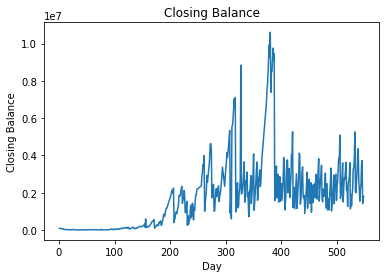

In [2]:

# Let's plot the closing balance for each day to 
#visualize how the business has been performing over the days.
TD=T.sort_values('Day')

# Initialize empty lists for days and closing_balance
days = []
closing_balances = []

# Loop through each day and calculate the net change in balance
for day, group in TD.groupby('Day'):
    # Get the first and last transactions of the day
    last_transaction = group.iloc[-1]
    
    # Find the closing balance
    closing_balance = last_transaction['Balance']
    # Append the day and net change to the lists
    days.append(day)
    closing_balances.append(closing_balance)

# Create a line chart of net changes vs. days
plt.plot(days, closing_balances)
plt.xlabel('Day')
plt.ylabel('Closing Balance')
plt.title('Closing Balance')
plt.show()


In [3]:
# Let's find out the details of the payments made to IRS:
IRS = T[T['Details']=='TaxPayment']

taxdays=IRS.iloc[1]['Day']-IRS.iloc[0]['Day']
print(f'Tax payment happens every {taxdays} days')

#Finding out all rent and deposit payments
TProperties=T[(T['Account'].str.endswith('Rent'))|(T['Account'].str.endswith('Deposit'))]['Account'].unique()
TProperties
IRS

Tax payment happens every 58 days


,Account,Day,Details,Amount,Balance
23385,Tax Payment,127,TaxPayment,-27188.99,54952.88
56047,Tax Payment,185,TaxPayment,-119033.80,282717.00
5424,Tax Payment,242,TaxPayment,-1040084.00,537860.00
14320,Tax Payment,310,TaxPayment,-2031407.00,515148.50
28562,Tax Payment,381,TaxPayment,-3096236.00,7340261.00
35255,Tax Payment,421,TaxPayment,-3464183.00,1194475.00
43704,Tax Payment,480,TaxPayment,-3461838.00,5182397.00
53258,Tax Payment,540,TaxPayment,-3426451.00,4913956.00


In [4]:
#Let's find out the different kinds of payments and revenues that we have in the dataframe

unique_details = T['Details'].unique()
print(unique_details)


['Deposit' 'ItemPurchase' 'PublicParking' 'VehicleBought' 'Rent'
 'HospitalBill' 'TaxiRide' 'RecruitmentCampaign' 'DepositReturn'
 'DepositReturnFurniture' 'InteriorDesigner' 'Marketing' 'Wage' 'Revenue'
 'BankNegativeInterestRate' 'Investment' 'ParkingTicket' 'LoanPayout'
 'LoanPayment' 'ImportDelivery' 'InvestmentPayout' 'SubwayRide'
 'ReplacementWage' 'PlayerJobSalary' 'LoanPayOff' 'DeliveryContract'
 'TaxPayment' 'UnassignedWage' 'EmployeeTraining' 'DeliveryContractRefund'
 'ItemSold' 'ImportDeliveryRefund' 'BuildingBought' 'RentRevenue'
 'AutoTowService' 'BoatYearlyMaintenance' 'BoatBought']


In [5]:
# Let's find out the money we lost to inflation, ie 'BankNegativeInterestRate'
inflation_loss = T[T['Details']=='BankNegativeInterestRate']['Amount'].sum()*-1
print(f'We have lost USD {inflation_loss:,.1f} to inflation till date.')


We have lost USD 16,318,167.6 to inflation till date.


In [6]:
#That's worrisome. Let's find out how often the game decides to hit us with inflation.
inflation_data=T[T['Details']=='BankNegativeInterestRate']
#print(f'{inflation_data}')
#We find that inflation charges are made every seven days. Generating a list of days to notify us when this charge is made.
upcoming_inf=[]
for i in range(10):
    if i==0:
        inf_day=inflation_data.iloc[-1]['Day']+7
    else:
        inf_day+=7
    upcoming_inf.append(inf_day)
print(f'Expect inflation charges on Days:\n {upcoming_inf}')
#The most profitable day in the history of the company.
# Group the expenses by day and sum the amounts for each day
daily_revenue = T.groupby('Day')['Amount'].sum()

# Find the day with the maximum revenue
max_revenue_day = daily_revenue.idxmax()
max_revenue=daily_revenue.max()
print(f'We generated the most revenue on Day {max_revenue_day} and netted about USD {max_revenue:,.2f}')


Expect inflation charges on Days:
 [554, 561, 568, 575, 582, 589, 596, 603, 610, 617]
We generated the most revenue on Day 365 and netted about USD 16,795,912.37


In [7]:
#Categories of Spend
unique_spends = T[T['Amount']<=0]['Details'].unique()
print(unique_spends)

['Deposit' 'ItemPurchase' 'PublicParking' 'VehicleBought' 'Rent'
 'HospitalBill' 'TaxiRide' 'RecruitmentCampaign' 'InteriorDesigner'
 'Marketing' 'Wage' 'BankNegativeInterestRate' 'Investment'
 'ParkingTicket' 'LoanPayment' 'ImportDelivery' 'SubwayRide'
 'ReplacementWage' 'LoanPayOff' 'DeliveryContract' 'TaxPayment'
 'UnassignedWage' 'EmployeeTraining' 'BuildingBought' 'AutoTowService'
 'BoatYearlyMaintenance' 'BoatBought']


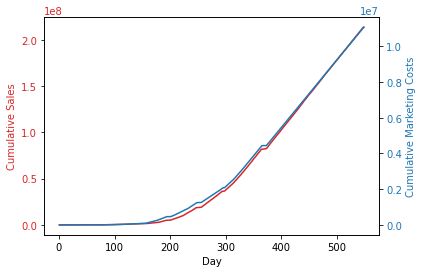

In [8]:
#Impact of marketing on the Sales.
marketing_costs = []
daily_sales = []

for day, group in TD.groupby('Day'):
    #Calculate Daily Sales
    daily_sale = group[group['Details']=='Revenue']['Amount'].sum()
    daily_sales.append(daily_sale)
    # Calculate the Daily Marketing Spend
    marketing_cost = group[group['Details'] == 'Marketing']['Amount'].sum()*-1
    marketing_costs.append(marketing_cost)
    

# Calculate the cumulative sum of marketing costs
cumulative_costs = [sum(marketing_costs[:i+1]) for i in range(len(marketing_costs))]
#Calculate the cumulative sales
cumulative_sales = [sum(daily_sales[:i+1]) for i in range(len(daily_sales))]
# Create a line chart of cumulative sales and cumulative marketing costs vs. days
fig, ax1 = plt.subplots()

# plot closing balance on first y-axis
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('Cumulative Sales', color=color)
ax1.plot(days, cumulative_sales, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# plot daily marketing costs on second y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_xlabel('Day')
ax2.set_ylabel('Cumulative Marketing Costs', color=color)
ax2.plot(days, cumulative_costs, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

In [9]:
#Let's focus on finding a few KPI's to analyse the business. 
#Last Recorded Day
day=T.iloc[-1]['Day']

#1. Revenue
net_revenue=T[T['Details']=='Revenue']['Amount'].sum()

#2. Gross Profit Margin: (Revenue-COGS)/(Revenue)
cogs=T[T['Details']=='ImportDelivery']['Amount'].sum()*-1

gpm=((net_revenue-cogs)/(net_revenue))*100
#3. Net Profit 
net_profit = (net_revenue-(T[T['Amount']<=0]['Amount'].sum()*-1)
              -(T[T['Details']=='InvestmentPayout']['Amount'].sum()*-1)
              +(T[T['Details']=='Investment']['Amount'].sum()*-1)
             -(T[T['Details']=='TaxPayment']['Amount'].sum()*-1))
              
#4. Net Profit Margin: ((revenue-net_expenses)/(revenue))*100
npm=((net_revenue-(T[T['Amount']<=0]['Amount'].sum()*-1))/(net_revenue))*100

#5. Return on Investment (ROI): ((net_revenue-total_invested_amount)/(total_invested_amount))*100
business_investments_list=['Deposit','Rent','VehicleBought','ItemPurchase','RecruitmentCampaign','InteriorDesigner','Marketing','Wage','ImportDelivery'
                           ,'DeliveryContract']
total_invested_amount=T[T['Details'].isin(business_investments_list)]['Amount'].sum()*-1
roi=((net_revenue-total_invested_amount)/(total_invested_amount))*100

#6. Cost of Goods Sold (COGS)
#Found out earlier
#7. Operating Expenses
ops_list=['ItemPurchase','Marketing','Wage','ImportDelivery','ReplacementWage','DeliveryContract','EmployeeTraining','UnassignedWage']
operating_expenses=T[T['Details'].isin(ops_list)]['Amount'].sum()*-1

#8. Break Even Point (BEP) Total fixed costs divided by contribution margin (revenue minus variable costs)
variable_costs_list=['ReplacementWage','LoanPayment','LoanPayOff','TaxPayment','EmployeeTraining','UnassignedWage','ReplacementWage','BankNegativeInterestRate']
variable_costs=(T[T['Details'].isin(variable_costs_list)]['Amount'].sum()*-1)
bep=(total_invested_amount)/(net_revenue-variable_costs)

print(f'KPIs: \n 1. Net Revenue as of Day {day} : USD {net_revenue:,.2f} \n 2. Gross Profit Margin: {gpm} %. \n 3. Net Profit = USD {net_profit:,.2f}') 
print(f' 4. Net Profit Margin: {npm:.2f}%.\n 5. Return on Investment(ROI): {roi:.2f}%.\n 6. Cost of Goods Sold (COGS): USD {cogs:,.2f}')
print(f' 7. Operating Expenses: USD {operating_expenses:,.2f}\n 8. Break Even Point (BEP): {bep:.2f}' )

KPIs: 
 1. Net Revenue as of Day 548 : USD 213,635,105.94 
 2. Gross Profit Margin: 90.37306154645943 %. 
 3. Net Profit = USD 146,765,804.82
 4. Net Profit Margin: -21.10%.
 5. Return on Investment(ROI): 217.00%.
 6. Cost of Goods Sold (COGS): USD 20,566,520.16
 7. Operating Expenses: USD 49,539,598.58
 8. Break Even Point (BEP): 0.37


In [10]:
#In order to differentiate between the various businesses more easily and to enable further data analysis on Tableau, let's
#read the dataframe that contains the various unique ids of each business and add them to the transactions dataframe

trans_id = pd.read_csv(directory+'Unique_Business_ID.csv')
trans_id

,Transaction ID,Business,Status,Last Operational Day
0,7,Karbucks,Inactive,75
1,15,Katara Jewels,Inactive,129
2,1,Andy's Diamonds,Inactive,247
3,14,Katar Spirits,Inactive,287
4,6,Karbucks HK,Inactive,287
5,8,Karvin Kueen,Inactive,300
6,12,Katalytica,Inactive,310
7,16,Phillip Web Design,Inactive,328
8,13,Katar Midtown,Active,547
9,11,Katalytica Midtown,Active,547


In [11]:
T.head()

,Account,Day,Details,Amount,Balance
0,42 3rd Street Deposit,1,Deposit,-1230.692,98769.30
7,Purchase from Discount Market,1,ItemPurchase,-80.000,82305.47
6,Purchase from Mr. Scott's Office Supplies,1,ItemPurchase,-1600.000,82385.47
5,Purchase from Mr. Scott's Office Supplies,1,ItemPurchase,-3600.000,83985.47
8,Public parking for UMC Desert,1,PublicParking,-15.000,82290.47


In [12]:
#Using a regular expression to match the business transactions with the business list
T_Business=T[T['Account'].str.contains('|'.join(trans_id['Business']))]
T_Business

#T_Business.to_csv("Business_Transactions.csv",index=False)

,Account,Day,Details,Amount,Balance
23,Marketing campaigns for Katalytica,4,Marketing,-500.0,70235.28
24,Evie Jones (Katalytica Daily Wage),4,Wage,-336.0,69899.28
25,Leon Nelson (Katalytica Daily Wage),4,Wage,-192.0,69707.28
26,Nancy Thompson (Katalytica Daily Wage),4,Wage,-53.0,69654.28
29,Katalytica Revenue,4,Revenue,678.0,70315.30
...,...,...,...,...,...
54409,Marketing campaigns for Elite Couture,548,Marketing,-1350.0,2445315.00
54410,Marketing campaigns for The Green Salad,548,Marketing,-1350.0,2443965.00
54412,Marketing campaigns for Katalytica Midtown,548,Marketing,-6350.0,2428265.00
54406,Marketing campaigns for Karakata Associates,548,Marketing,-500.0,2450765.00


In [13]:
#Let's assign the transaction ID and Business Name to each transaction for a business in the main dataframe 
for index, row in T.iterrows():
    # Check if any value in the "Account" column of T is contained in the the "Business" column of trans_id.
    if (trans_id['Business'].apply(lambda x: x in row['Account']).any()):
        # If there's a match, get the Transaction ID from trans_id and assign it to the corresponding row in T
        transaction_id = trans_id.loc[trans_id['Business'].apply(lambda x: x in row['Account']), 'Transaction ID'].values[0]
        business_id = trans_id.loc[trans_id['Business'].apply(lambda x: x in row['Account']), 'Business'].values[0]
        T.at[index, 'Transaction ID'] = transaction_id
        T.at[index, 'Business Name'] = business_id

#Export the updated dataframe to the csv file.        
T.to_csv(directory+'UpdatedLedger.csv',index=False)


In [14]:
business_transactions = T[T['Transaction ID'].notnull()]
business_transactions

,Account,Day,Details,Amount,Balance,Transaction ID,Business Name
23,Marketing campaigns for Katalytica,4,Marketing,-500.0,70235.28,12.0,Katalytica
24,Evie Jones (Katalytica Daily Wage),4,Wage,-336.0,69899.28,12.0,Katalytica
25,Leon Nelson (Katalytica Daily Wage),4,Wage,-192.0,69707.28,12.0,Katalytica
26,Nancy Thompson (Katalytica Daily Wage),4,Wage,-53.0,69654.28,12.0,Katalytica
29,Katalytica Revenue,4,Revenue,678.0,70315.30,12.0,Katalytica
...,...,...,...,...,...,...,...
54409,Marketing campaigns for Elite Couture,548,Marketing,-1350.0,2445315.00,2.0,Elite Couture
54410,Marketing campaigns for The Green Salad,548,Marketing,-1350.0,2443965.00,17.0,The Green Salad
54412,Marketing campaigns for Katalytica Midtown,548,Marketing,-6350.0,2428265.00,12.0,Katalytica
54406,Marketing campaigns for Karakata Associates,548,Marketing,-500.0,2450765.00,5.0,Karakata Associates


In [15]:
#Separating Individual Business Transactions into a separate folder.

#Approach 1
#for i in range(len(trans_id)):
    #individual_business_transactions = []
    #for index,row in business_transactions.iterrows():
    #    if trans_id.iloc[i]['Business']==row['Business Name']:
    #        individual_business_transactions.append(row)
    #individual_business_transactions=pd.DataFrame()
    #individual_business_transactions.to_csv(f"{trans_id.iloc[i]['Business']}.csv")
#individual_business_transactions

#Approach2
#assign_name(x):
#    for i in range(len(trans_id)):
#        if x.

#for i in range(len(trans_id)):
#    individual_business_transactions = []
#    business_transactions['Business Name'].apply(lambda x: assign_name(x))

import os

#Approach 3: Works
directory2 = 'Individual Business Transactions'
#creating a directory if one does not exist
if not os.path.exists(directory+directory2):
    os.makedirs(directory+directory2)
    
for i in range(len(trans_id)):
    ind_business = business_transactions[business_transactions['Business Name']==trans_id.iloc[i]['Business']]
    ind_business = ind_business.drop('Balance',axis=1)
    ind_business.to_csv(f"{directory}{directory2}/{trans_id.iloc[i]['Business']}.csv",index=False)

In [16]:
#Costs:
spends = T[T['Amount']<=0]['Details'].unique()
#Sales:
sales = T[T['Amount']>0]['Details'].unique()

print(spends)
print(sales)

['Deposit' 'ItemPurchase' 'PublicParking' 'VehicleBought' 'Rent'
 'HospitalBill' 'TaxiRide' 'RecruitmentCampaign' 'InteriorDesigner'
 'Marketing' 'Wage' 'BankNegativeInterestRate' 'Investment'
 'ParkingTicket' 'LoanPayment' 'ImportDelivery' 'SubwayRide'
 'ReplacementWage' 'LoanPayOff' 'DeliveryContract' 'TaxPayment'
 'UnassignedWage' 'EmployeeTraining' 'BuildingBought' 'AutoTowService'
 'BoatYearlyMaintenance' 'BoatBought']
['DepositReturn' 'DepositReturnFurniture' 'Revenue' 'LoanPayout'
 'InvestmentPayout' 'PlayerJobSalary' 'DeliveryContractRefund' 'ItemSold'
 'ImportDeliveryRefund' 'RentRevenue']


In [101]:
sales[0]

'DepositReturn'

In [100]:
spends[0]

'Deposit'